In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro,f_oneway
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [64]:
train=pd.read_csv('C:\\Users\\Lenovo\\Downloads\\titanic\\train.csv')
test=pd.read_csv('C:\\Users\\Lenovo\\Downloads\\titanic\\test.csv')

In [65]:
pas_id=test['PassengerId']
pas_id.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.shape

(891, 12)

In [7]:
test.shape

(418, 11)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train['Survived'].value_counts(1)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

<AxesSubplot:>

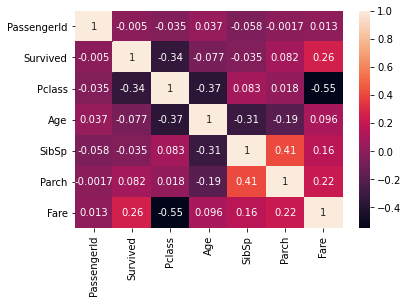

In [12]:
sns.heatmap(train.corr(),annot=True)

<AxesSubplot:xlabel='Survived', ylabel='count'>

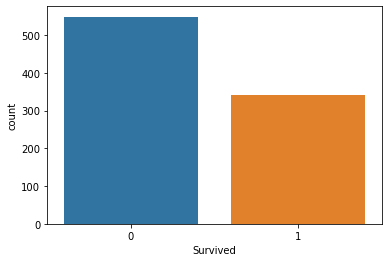

In [13]:
sns.countplot(train['Survived'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

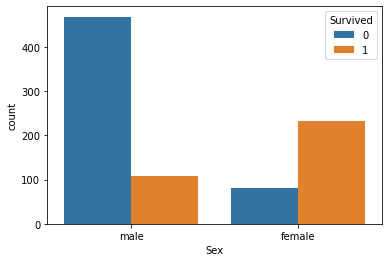

In [14]:
sns.countplot(train['Sex'],hue='Survived',data=train)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

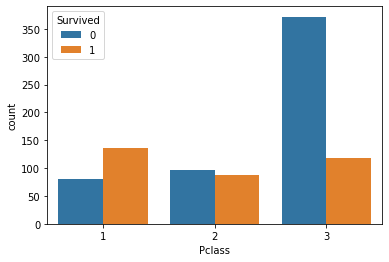

In [15]:
sns.countplot(train['Pclass'],hue='Survived',data=train)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

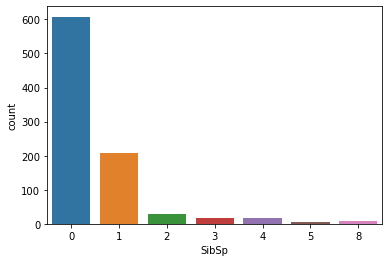

In [16]:
sns.countplot(train['SibSp'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

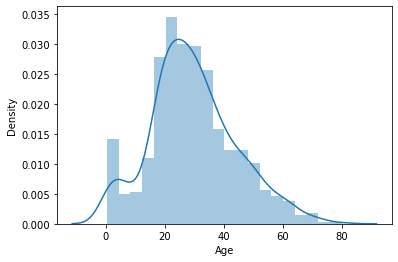

In [17]:
sns.distplot(train['Age'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

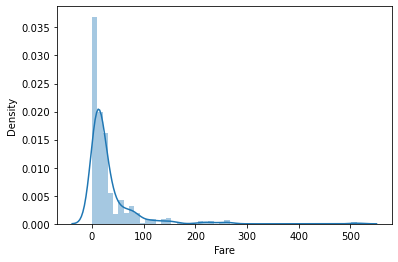

In [18]:
sns.distplot(train['Fare'])


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

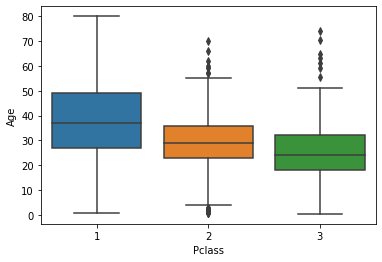

In [19]:
sns.boxplot('Pclass','Age',data=train)

 # From EDA we got

Cabin column have lots of null values so will drop it.

Ticket and paddenger Id is not usefull and does not have impact on survivl so drop it.

Passenger travelling in higher class have more chance to survived

Females survived more then Males.

In the 1st class Females were more then Males it is also a resion that females have more chance to survived.

Passenger travelling with siblings ,parents have more chance to survived.

for pclass 1 avg age is 37,for pclass 2 avg age is 29 for pclass 3 avg age is 24

In [28]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
null_val_per=(train.isnull().sum()/train.isnull().count())*100
null_val_per

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Null value percentage for age is 19% and for cabin is 77% and for embarked is 0.2% so we will impute null value for age and emarked and will drop cabin

<AxesSubplot:>

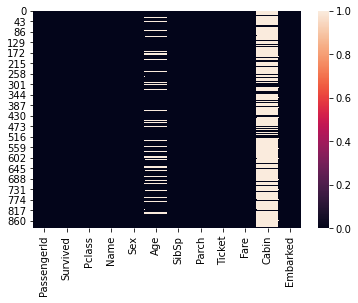

In [31]:
sns.heatmap(train.isnull())

In [32]:
# for pclass 1 avg age is 37
# for pclass 2 avg age is 29
# for pclass 3 avg age is 24

In [66]:
# With d help of this we impute missing val for age

def imput(col):
    Age=col[0]
    Pclass=col[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [67]:
train['Age']=train[['Age','Pclass']].apply(imput,axis=1)

In [68]:
train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode()[0])

<AxesSubplot:>

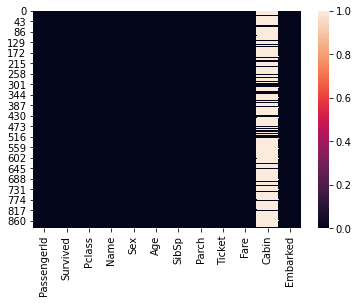

In [40]:
sns.heatmap(train.isnull())

In [41]:
# check null value in test data

test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [43]:
null_val_per=(test.isnull().sum()/test.isnull().count())*100
null_val_per

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [69]:
# With d help of this we impute missing val for age

def imput(col):
    Age=col[0]
    Pclass=col[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [70]:
test['Age']=test[['Age','Pclass']].apply(imput,axis=1)

In [71]:
test['Age'].isnull().sum()

0

In [72]:
# droping features
train.drop(['PassengerId','Name','Ticket','Cabin','Fare'],axis=1,inplace=True)
test.drop(['PassengerId','Name','Ticket','Cabin','Fare'],axis=1,inplace=True)

In [73]:
train['Age']=np.log(train['Age'])
test['Age']=np.log(test['Age'])

In [74]:
# Encoding 

train=pd.get_dummies(train,columns=['Sex','Embarked'], drop_first=True)
test=pd.get_dummies(test,columns=['Sex','Embarked'], drop_first=True)

In [75]:
x=train.drop('Survived',axis=1)
y=train['Survived']

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

### LogisticRegression

In [77]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[145,  23],
       [ 27,  73]], dtype=int64)

In [78]:
acc_score=accuracy_score(y_test,y_pred)
acc_score

0.8134328358208955

### Decision Tree

In [33]:
dtc=DecisionTreeClassifier(random_state=140)
dtc.fit(x_train,y_train)

print(dtc.score(x_test,y_test))

0.7947761194029851


In [75]:
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV

### Random Forest

In [77]:
RF=RandomForestClassifier(random_state=0)
param={'n_estimators':np.arange(1,100),'criterion':['gini','entropy']}
GS=GridSearchCV(RF,param,cv=3,scoring='accuracy')
GS.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='accuracy')

In [78]:
GS.best_params_

{'criterion': 'gini', 'n_estimators': 40}

In [45]:
RF=RandomForestClassifier(criterion='gini',n_estimators=40)
kf=KFold(shuffle=True,n_splits=3,random_state=0)
score=cross_val_score(RF,x_train,y_train,cv=kf,scoring='accuracy')
print('soore:',np.mean(score))

soore: 0.8218211941038028


### AdaBoost

In [79]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()

adb.fit(x_train,y_train)



AdaBoostClassifier()

In [80]:
print(adb.score(x_test,y_test))

0.8097014925373134


### Predicting on test data

In [81]:
test.head()

,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
0,3,3.540959,0,0,1,1,0
1,3,3.850148,1,0,0,0,1
2,2,4.127134,0,0,1,1,0
3,3,3.295837,0,0,1,0,1
4,3,3.091042,1,1,0,0,1


In [82]:
submission_pred=lr.predict(test)


In [90]:
test11=pd.read_csv('C:\\Users\\Lenovo\\Downloads\\titanic\\test.csv')

In [91]:
test11.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [97]:
survived=np.array(submission_pred).tolist()
len(survived)

418

In [98]:
test11.insert(2,column="Survived",value=survived)
test11.head()

,PassengerId,Pclass,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,0,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,0,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,0,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,0,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Makeing CSV File

In [100]:
test1=test11.drop(['Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1)
test1.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [102]:
test1.to_csv('Submission_file.csv',index=False)
test1.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [103]:
df1=pd.read_csv('Submission_file.csv')
df1.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [104]:
df1.shape

(418, 2)